In [7]:
import pandas as pd
data = pd.read_csv("/content/MAINTENANCE PREDICTIVE FOR INDUSTRIAL MACHINES.csv")
data

,Machine_ID,Machine_Type,Runtime,Temperature,Vibration,Pressure,Power_Consumption,Maintenance_History,Downtime,Failures,Remaining_Useful_Life,Ambient_Temperature
0,7,Sealing,6566.553173,74.883651,0.665550,38.050919,209.748598,0,0.0,0,632.557007,35.390333
1,4,Packaging,3555.619002,72.927617,4.168720,35.851286,428.760901,0,0.0,0,633.456781,39.443937
2,8,Sealing,9665.634684,88.630938,1.077148,17.134947,494.769430,0,0.0,0,968.517304,27.108116
3,5,Filling,8036.032911,66.171745,2.156175,48.747631,285.545612,0,0.0,0,845.114619,20.295214
4,7,Packaging,6341.134422,69.350498,2.647299,24.161024,228.708278,0,0.0,1,266.119195,38.737649
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,7,Filling,6284.855234,67.185232,1.647170,22.251792,288.818436,0,0.0,0,968.017432,23.064682
4996,4,Packaging,8903.457562,73.998188,4.617118,28.588027,213.345208,0,0.0,0,873.257918,25.560923
4997,5,Packaging,2177.283173,66.001477,3.593940,12.616131,401.896838,0,0.0,0,619.321582,37.678558
4998,3,Sealing,9820.585234,76.745767,3.817484,29.959289,381.130646,0,0.0,0,680.859040,32.532447


In [8]:
data.describe()

,Machine_ID,Runtime,Temperature,Vibration,Pressure,Power_Consumption,Maintenance_History,Downtime,Failures,Remaining_Useful_Life,Ambient_Temperature
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5.478200,5070.502477,74.934422,2.746934,30.109726,301.706237,0.195800,1.049622,0.102000,700.816941,30.041099
std,2.877982,2857.283205,8.557220,1.303115,11.577406,114.931279,0.396855,2.418695,0.302679,211.021493,5.773283
min,1.000000,101.833433,60.003559,0.500042,10.000821,100.058307,0.000000,0.000000,0.000000,0.064476,20.000951
25%,3.000000,2641.798117,67.590948,1.612515,20.096943,204.214557,0.000000,0.000000,0.000000,585.652613,25.090982
50%,5.000000,5089.821186,74.883282,2.731185,30.182803,303.430497,0.000000,0.000000,0.000000,726.795932,29.975853
75%,8.000000,7520.417999,82.082209,3.881799,40.072358,401.143193,0.000000,0.000000,0.000000,866.395510,35.054190
max,10.000000,9997.438595,89.996780,4.998627,49.995642,499.989547,1.000000,9.982072,1.000000,999.766411,39.997901


In [13]:
data.isnull().sum()

,0
Machine_ID,0
Machine_Type,0
Runtime,0
Temperature,0
Vibration,0
Pressure,0
Power_Consumption,0
Maintenance_History,0
Downtime,0
Failures,0


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [15]:
data.duplicated().sum()

0

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Machine_ID             5000 non-null   int64  
 1   Machine_Type           5000 non-null   object 
 2   Runtime                5000 non-null   float64
 3   Temperature            5000 non-null   float64
 4   Vibration              5000 non-null   float64
 5   Pressure               5000 non-null   float64
 6   Power_Consumption      5000 non-null   float64
 7   Maintenance_History    5000 non-null   int64  
 8   Downtime               5000 non-null   float64
 9   Failures               5000 non-null   int64  
 10  Remaining_Useful_Life  5000 non-null   float64
 11  Ambient_Temperature    5000 non-null   float64
dtypes: float64(8), int64(3), object(1)
memory usage: 468.9+ KB


In [17]:
data['Downtime'].value_counts()

,count
Downtime,
0.000000,4021
3.697011,1
5.310294,1
5.070649,1
1.566292,1
...,...
3.756031,1
5.606288,1
3.496951,1


In [20]:
data['Failures'].value_counts()

,count
Failures,
0,4490
1,510


In [21]:
data = data[['Machine_ID','Runtime','Temperature','Failures']]
data

,Machine_ID,Runtime,Temperature,Failures
0,7,6566.553173,74.883651,0
1,4,3555.619002,72.927617,0
2,8,9665.634684,88.630938,0
3,5,8036.032911,66.171745,0
4,7,6341.134422,69.350498,1
...,...,...,...,...
4995,7,6284.855234,67.185232,0
4996,4,8903.457562,73.998188,0
4997,5,2177.283173,66.001477,0
4998,3,9820.585234,76.745767,0


In [22]:
data.drop('Machine_ID',axis=1,inplace=True)

<ipython-input-22-d3f47fdf5ff6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('Machine_ID',axis=1,inplace=True)


In [23]:
data

,Runtime,Temperature,Failures
0,6566.553173,74.883651,0
1,3555.619002,72.927617,0
2,9665.634684,88.630938,0
3,8036.032911,66.171745,0
4,6341.134422,69.350498,1
...,...,...,...
4995,6284.855234,67.185232,0
4996,8903.457562,73.998188,0
4997,2177.283173,66.001477,0
4998,9820.585234,76.745767,0


In [24]:
data['Machine_ID'] = [f'{i+1}' for i in range(data.shape[0])]
data

<ipython-input-24-69aab1b14295>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Machine_ID'] = [f'{i+1}' for i in range(data.shape[0])]


,Runtime,Temperature,Failures,Machine_ID
0,6566.553173,74.883651,0,1
1,3555.619002,72.927617,0,2
2,9665.634684,88.630938,0,3
3,8036.032911,66.171745,0,4
4,6341.134422,69.350498,1,5
...,...,...,...,...
4995,6284.855234,67.185232,0,4996
4996,8903.457562,73.998188,0,4997
4997,2177.283173,66.001477,0,4998
4998,9820.585234,76.745767,0,4999


In [25]:
data.describe()

,Runtime,Temperature,Failures
count,5000.000000,5000.000000,5000.000000
mean,5070.502477,74.934422,0.102000
std,2857.283205,8.557220,0.302679
min,101.833433,60.003559,0.000000
25%,2641.798117,67.590948,0.000000
50%,5089.821186,74.883282,0.000000
75%,7520.417999,82.082209,0.000000
max,9997.438595,89.996780,1.000000


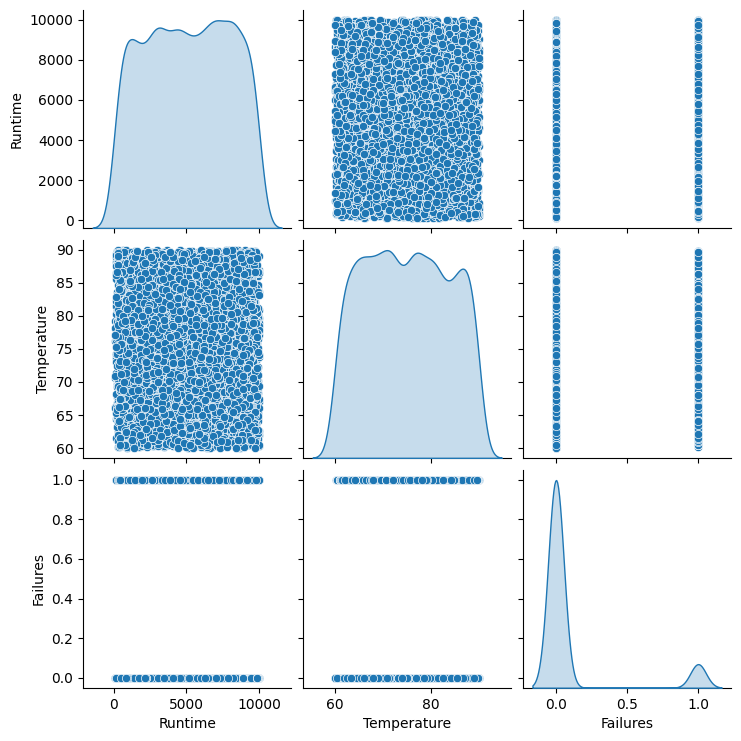

In [26]:
sns.pairplot(data, diag_kind='kde')
plt.show()

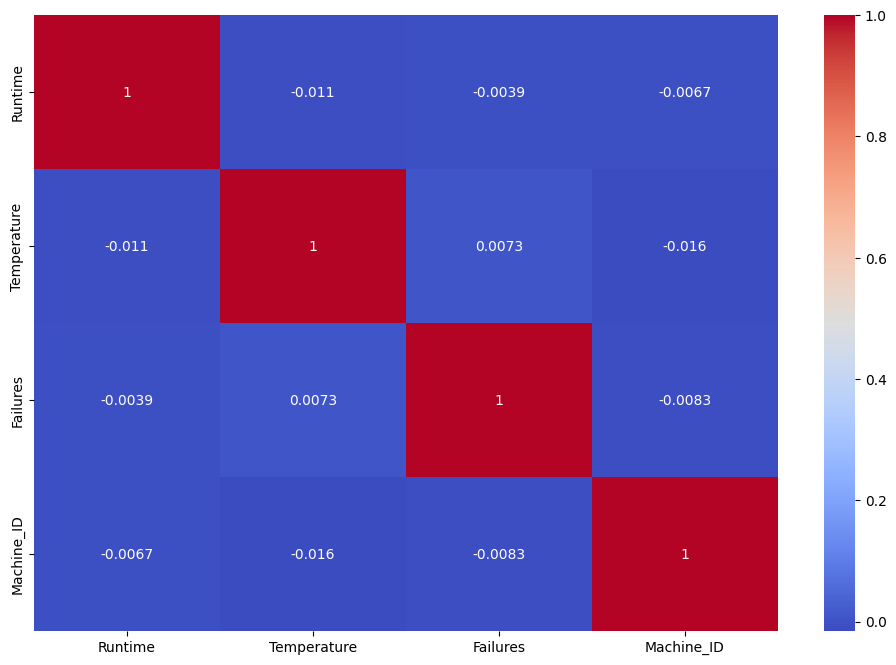

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()


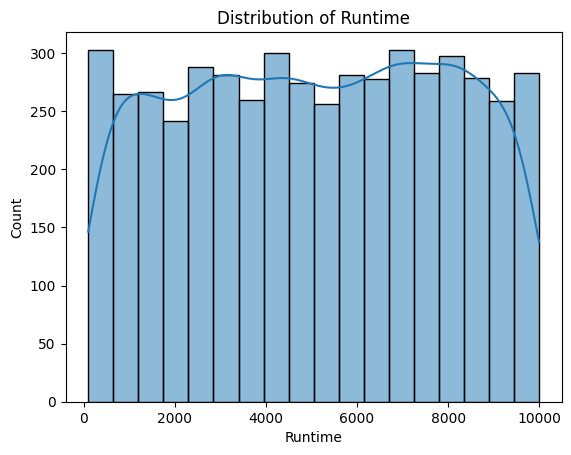

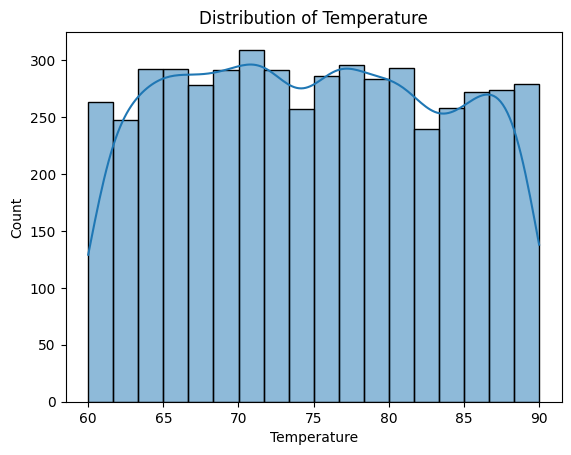

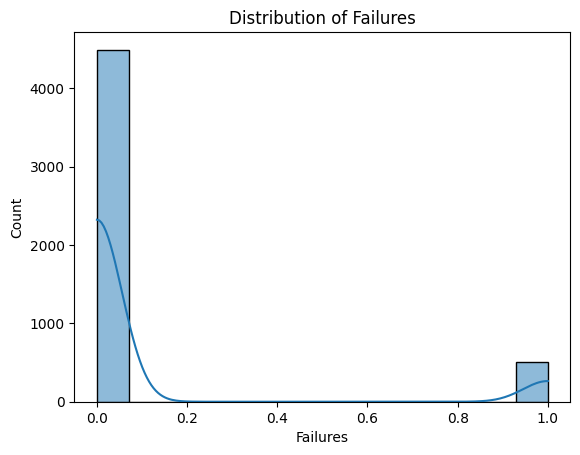

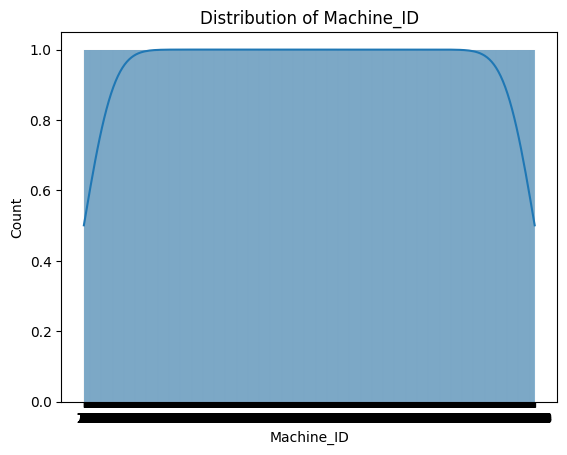

In [29]:
for col in data.columns:
    plt.figure()
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [56]:
x = data.drop(['Machine_ID','Failures'],axis=1)
y = data['Failures']

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [59]:
df_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
df_train_scaled

,Runtime,Temperature
0,0.729188,-0.318273
1,-0.444751,0.029291
2,-0.319104,-0.992720
3,-1.413547,-0.655307
4,0.765038,-1.483198
...,...,...
3995,-1.526316,0.451389
3996,1.502312,0.158360
3997,0.233462,-0.435411
3998,-0.957627,0.397952


In [60]:
df_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)
df_test_scaled

,Runtime,Temperature
0,-0.062027,0.868866
1,1.599597,-1.486469
2,0.233614,-0.277767
3,1.149438,1.529571
4,-0.539885,1.023404
...,...,...
995,0.083961,1.133277
996,1.236015,0.085474
997,1.058865,-1.376298
998,-1.034338,-0.934189


In [61]:
np.round(x_train.describe(),1)

,Runtime,Temperature
count,4000.0,4000.0
mean,5065.4,74.9
std,2864.9,8.6
min,101.8,60.0
25%,2634.0,67.5
50%,5110.0,74.9
75%,7507.6,82.1
max,9997.4,90.0


In [62]:
np.round(df_train_scaled.describe(),1)

,Runtime,Temperature
count,4000.0,4000.0
mean,0.0,0.0
std,1.0,1.0
min,-1.7,-1.7
25%,-0.8,-0.9
50%,0.0,0.0
75%,0.9,0.8
max,1.7,1.8


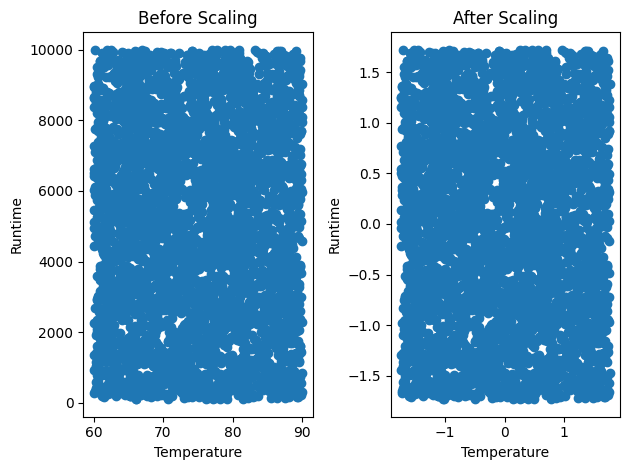

In [63]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2)
ax1.scatter(x_train['Temperature'],x_train['Runtime'])
ax2.scatter(df_train_scaled['Temperature'],df_train_scaled['Runtime'])
ax1.set_title('Before Scaling')
ax2.set_title('After Scaling')
ax1.set_xlabel('Temperature')
ax2.set_xlabel('Temperature')
ax1.set_ylabel('Runtime')
ax2.set_ylabel('Runtime')
plt.tight_layout()
plt.show()

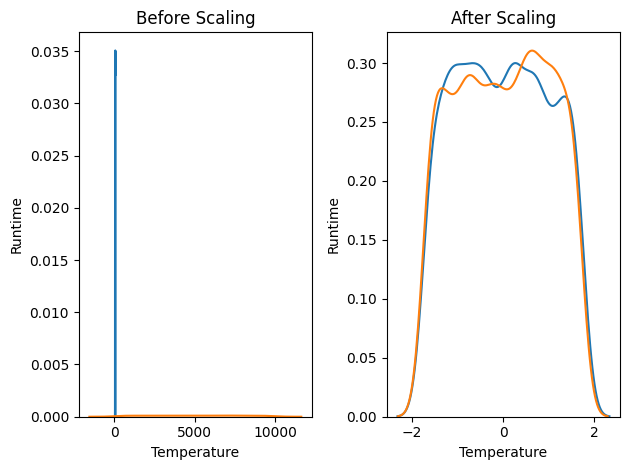

In [64]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2)
ax1.set_title('Before Scaling')
ax2.set_title('After Scaling')
ax1.set_xlabel('Temperature')
ax2.set_xlabel('Temperature')
ax1.set_ylabel('Runtime')
ax2.set_ylabel('Runtime')
sns.kdeplot(x_train['Temperature'],ax=ax1)
sns.kdeplot(x_train['Runtime'],ax=ax1)
sns.kdeplot(df_train_scaled['Temperature'],ax=ax2)
sns.kdeplot(df_train_scaled['Runtime'],ax=ax2)
plt.tight_layout()
plt.show()

In [109]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

# Oversampling with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Optional: Combine SMOTE with undersampling using SMOTEENN
# smoteenn = SMOTEENN(random_state=42)
# X_resampled, y_resampled = smoteenn.fit_resample(X_train, y_train)

lr = RandomForestClassifier(class_weight='balanced', random_state=42)
lr.fit(X_resampled,y_resampled)
y_pred = lr.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.64


In [71]:
lr =  DecisionTreeClassifier()
lr.fit(x_train_scaled,y_train)
y_pred = lr.predict(x_test_scaled)
print(accuracy_score(y_test,y_pred))

0.808


In [72]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(probability=True)
}

In [80]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, roc_auc_score
import numpy as np

# Assuming `models` is a dictionary containing different model instances, like:
# models = {'Model1': model1_instance, 'Model2': model2_instance, ...}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = {}

for model_name, model in models.items():
    # Cross-validation using KFold
    cv_scores = cross_val_score(model, x_train, y_train, cv=kf, scoring='f1')

    # Train and predict on the test set for each model
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1]  # Get probabilities for ROC-AUC

    # Calculate F1, Accuracy, Precision, and ROC-AUC scores
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    # Store results in the dictionary
    results[model_name] = {
        'CV F1-Score': np.mean(cv_scores),
        'Test F1-Score': f1,
        'Test Accuracy': accuracy,
        'Test Precision': precision,
        'ROC-AUC': roc
    }

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [81]:
results_df = pd.DataFrame(results).T
print(results_df)

                        CV F1-Score  Test F1-Score  Test Accuracy  \
Logistic Regression        0.000000       0.000000          0.899   
Decision Tree              0.067318       0.057143          0.802   
Random Forest              0.015256       0.018349          0.893   
Gradient Boosting          0.010000       0.000000          0.897   
Support Vector Machine     0.000000       0.000000          0.899   

                        Test Precision   ROC-AUC  
Logistic Regression           0.000000  0.475336  
Decision Tree                 0.055046  0.472417  
Random Forest                 0.125000  0.480716  
Gradient Boosting             0.000000  0.484108  
Support Vector Machine        0.000000  0.550843  


In [82]:
best_model_name = results_df['Test Accuracy'].idxmax()
best_model = models[best_model_name]

print(f"Best Model: {best_model_name}")

Best Model: Logistic Regression


In [75]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metricdels` is a dictionary containing different model instances, like:
# models = {'s import f1_score, accuracy_score, precision_score, roc_auc_score
import numpy as np

# Assuming `moModel1': model1_instance, 'Model2': model2_instance, ...}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = {}

for model_name, model in models.items():
    # Cross-validation using KFold
    cv_scores = cross_val_score(model, x_train_scaled, y_train, cv=kf, scoring='f1')

    # Train and predict on the test set for each model
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    y_proba = model.predict_proba(x_test_scaled)[:, 1]  # Get probabilities for ROC-AUC

    # Calculate F1, Accuracy, Precision, and ROC-AUC scores
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    # Store results in the dictionary
    results[model_name] = {
        'CV F1-Score': np.mean(cv_scores),
        'Test F1-Score': f1,
        'Test Accuracy': accuracy,
        'Test Precision': precision,
        'ROC-AUC': roc
    }

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [77]:
results_df = pd.DataFrame(results).T
print(results_df)

                        CV F1-Score  Test F1-Score  Test Accuracy  \
Logistic Regression        0.000000       0.000000          0.899   
Decision Tree              0.070301       0.048309          0.803   
Random Forest              0.014651       0.018182          0.892   
Gradient Boosting          0.009877       0.000000          0.897   
Support Vector Machine     0.000000       0.000000          0.899   

                        Test Precision   ROC-AUC  
Logistic Regression           0.000000  0.475336  
Decision Tree                 0.047170  0.468579  
Random Forest                 0.111111  0.474306  
Gradient Boosting             0.000000  0.484086  
Support Vector Machine        0.000000  0.470148  


In [84]:
best_model.fit(x_train, y_train)

LogisticRegression()

In [89]:
best_model.predict([[6566.553173,74.883651]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [104]:
best_model.predict([[90000,62]])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [102]:
data.where(data['Failures'] == 1).value_counts()

,,,,count
Runtime,Temperature,Failures,Machine_ID,
128.137321,77.453566,1.0,905,1
6643.902958,87.552405,1.0,3664,1
6789.878026,82.713715,1.0,4726,1
6787.770449,60.169890,1.0,52,1
6782.961561,68.360846,1.0,3552,1
...,...,...,...,...
3344.934938,77.322283,1.0,763,1
3340.400569,78.020338,1.0,4652,1
3321.509127,65.427075,1.0,3884,1


In [106]:
data['Failures'].value_counts()

,count
Failures,
0,4490
1,510
